In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
df.shape

(10127, 23)

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df.head()  # .style.set_properties(**{"background-color": "white","color": "black", "border-color": "black","font-size":"10pt",'width': 200})

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
df = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

Usuwam ze zbioru zmienne niepotrzebne w analizie.

In [7]:
pd.DataFrame.info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

W zbiorze nie ma brakujących danych.

In [9]:
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


Brak duplikatów

In [10]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [11]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [12]:
for col in df:
    print(df[col].unique())

['Existing Customer' 'Attrited Customer']
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
['M' 'F']
[3 5 4 2 0 1]
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
[5 6 4 3 2 1]
[1 4 2 3 6 0 5]
[3 2 0 1 4 5 6]
[12691.  8256.  3418. ...  5409.  5281. 10388.]
[ 777  864    0 ...  534  476 2241]
[11914.  7392.  3418. ... 11831.  5409.  8427.]
[1.335 1.541 2.594 ... 0.222 0.204 0.166]
[ 1144  1291  1887 ... 10291  8395 10294]
[ 42  33  20  28  24  31  36  32  26  17  29  27  21  30  16  18  23  22
  40  38  25  43  37  19  35  15  41  57  12  14  34  44  13  47  10  39
  5

Unikalne wartości dla każdej zmiennej.

6 zmiennych jakościowych, z czego 2 zmienne binarne (Gender, Attrition_Flag), 9 zmiennych skokowych (np. wiek, ilość transakcji itp.), pozostałe zmienne mają charakter ciągły.

In [13]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [14]:
df.describe(exclude = ['float', 'int64'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [15]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace(['Existing Customer'],'0')
df['Attrition_Flag'] = df['Attrition_Flag'].replace(['Attrited Customer'],'1')

Rekodowanie zmiennej zależnej.
0 dla klienta, który utrzymał relację z bankiem
1 dla klienta, który zrezygnował

**WYKRESY**

array([[<AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Relationship_Count'}>],
       [<AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>],
       [<AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>],
       [<AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

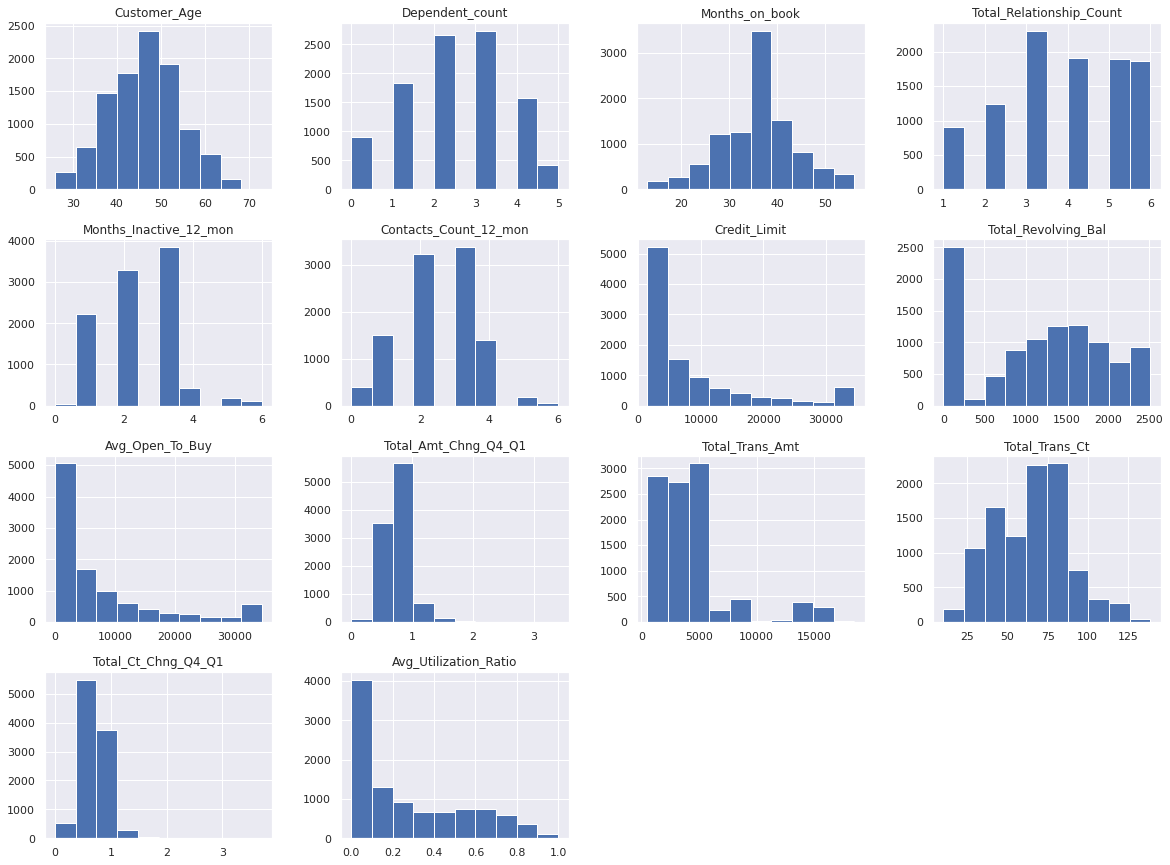

In [16]:
df.iloc[::,1:20].hist(figsize=(20,15))

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

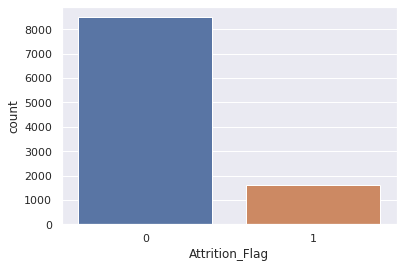

In [17]:
sns.countplot(data = df, x = 'Attrition_Flag')

In [18]:
df["Attrition_Flag"].astype(float).describe()

count    10127.000000
mean         0.160660
std          0.367235
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Attrition_Flag, dtype: float64

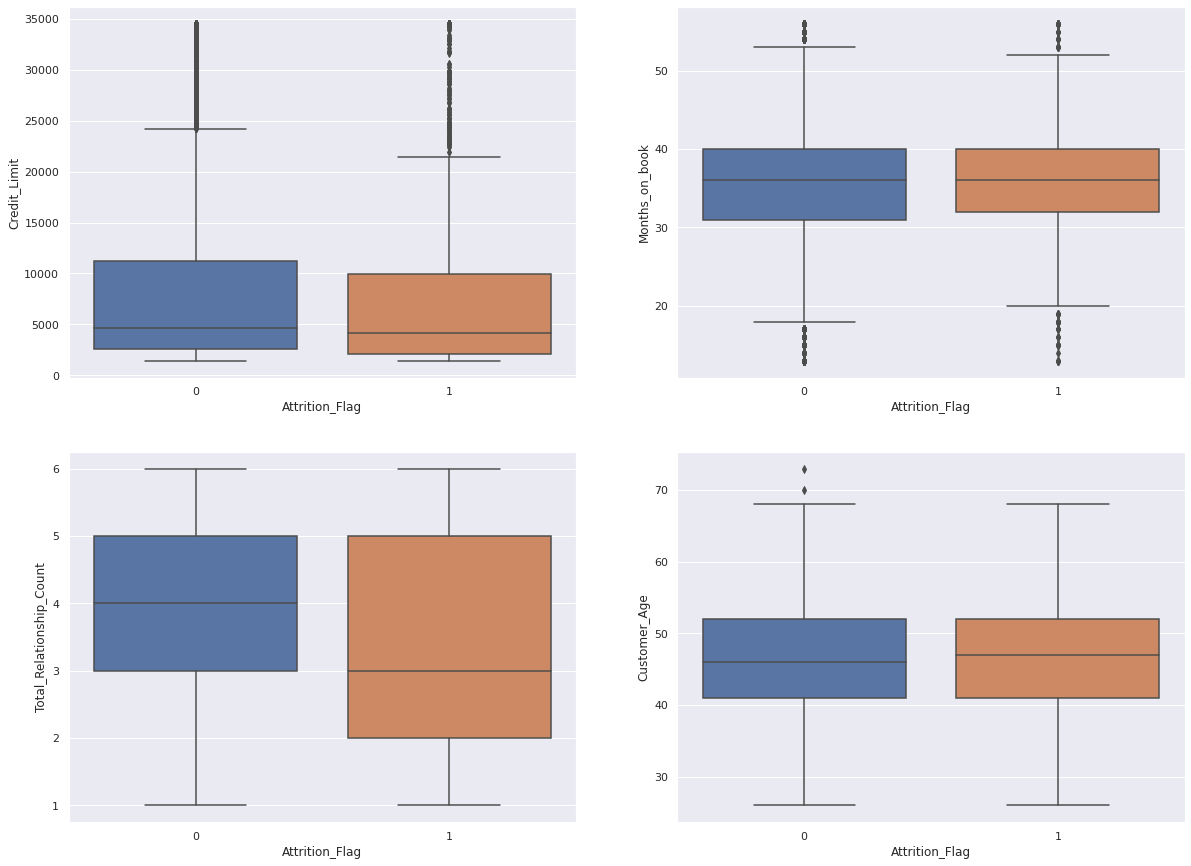

In [19]:
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')

plt.subplot(2,2,1)
sns.boxplot(x='Attrition_Flag', y='Credit_Limit',data=df);

plt.subplot(2,2,2)
sns.boxplot(x='Attrition_Flag', y='Months_on_book',data=df);

plt.subplot(2,2,3)
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count',data=df);

plt.subplot(2,2,4)
sns.boxplot(x='Attrition_Flag', y='Customer_Age',data=df);


Wykresy pudełkowe. 

Text(0.5, 1.0, 'Avg_Open_To_Buy Histogram')

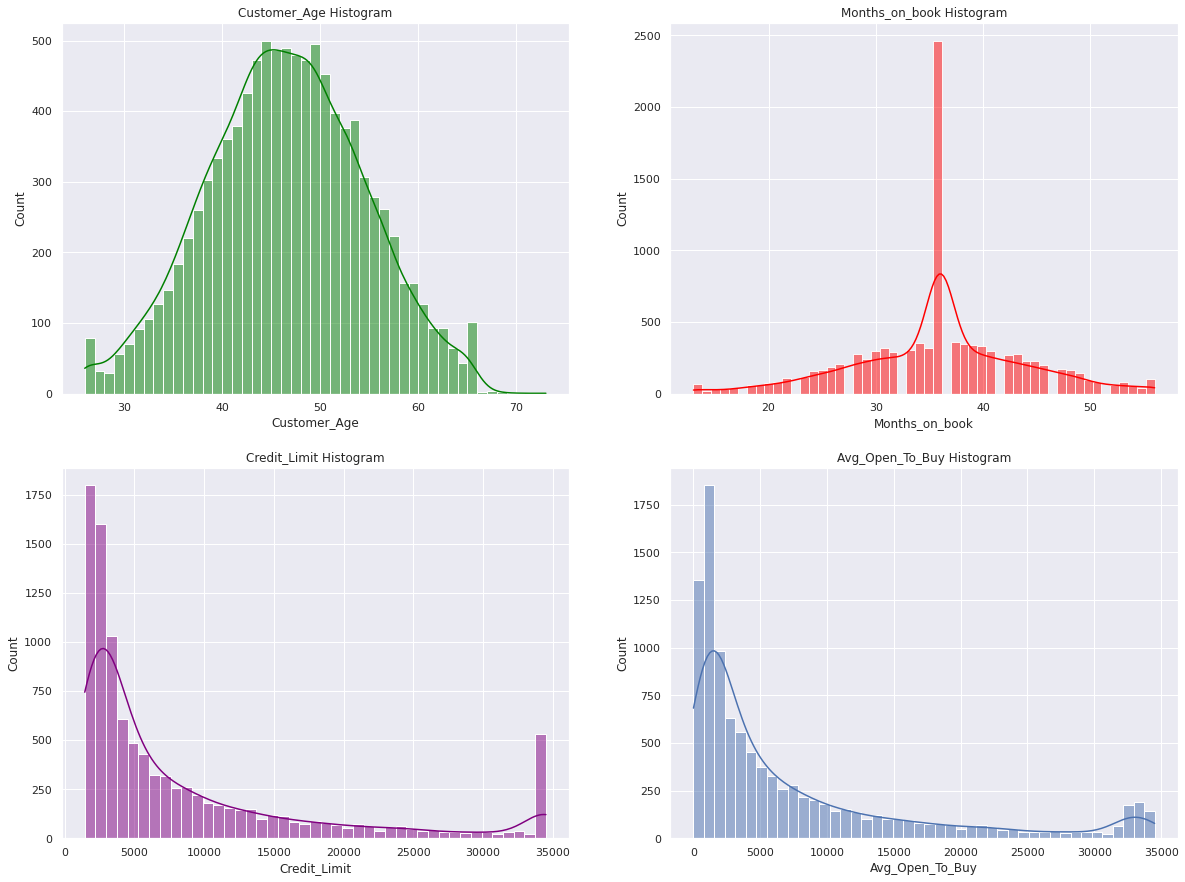

In [20]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.histplot(data = df, x = "Customer_Age", color = "green", kde = 1).set_title('Customer_Age Histogram')

plt.subplot(2,2,2)
sns.histplot(data = df, x = 'Months_on_book', color = "red", kde = 1).set_title('Months_on_book Histogram')

plt.subplot(2,2,3)
sns.histplot(data = df, x = 'Credit_Limit', color = "purple", kde = 1).set_title('Credit_Limit Histogram')

plt.subplot(2,2,4)
sns.histplot(data = df, x = 'Avg_Open_To_Buy', kde = 1).set_title('Avg_Open_To_Buy Histogram')

Rozkład zmiennych Customer_Age, Months_on_book, Credit_Limit, Avg_Open_To_Buy wraz z naniesionym histogramem.

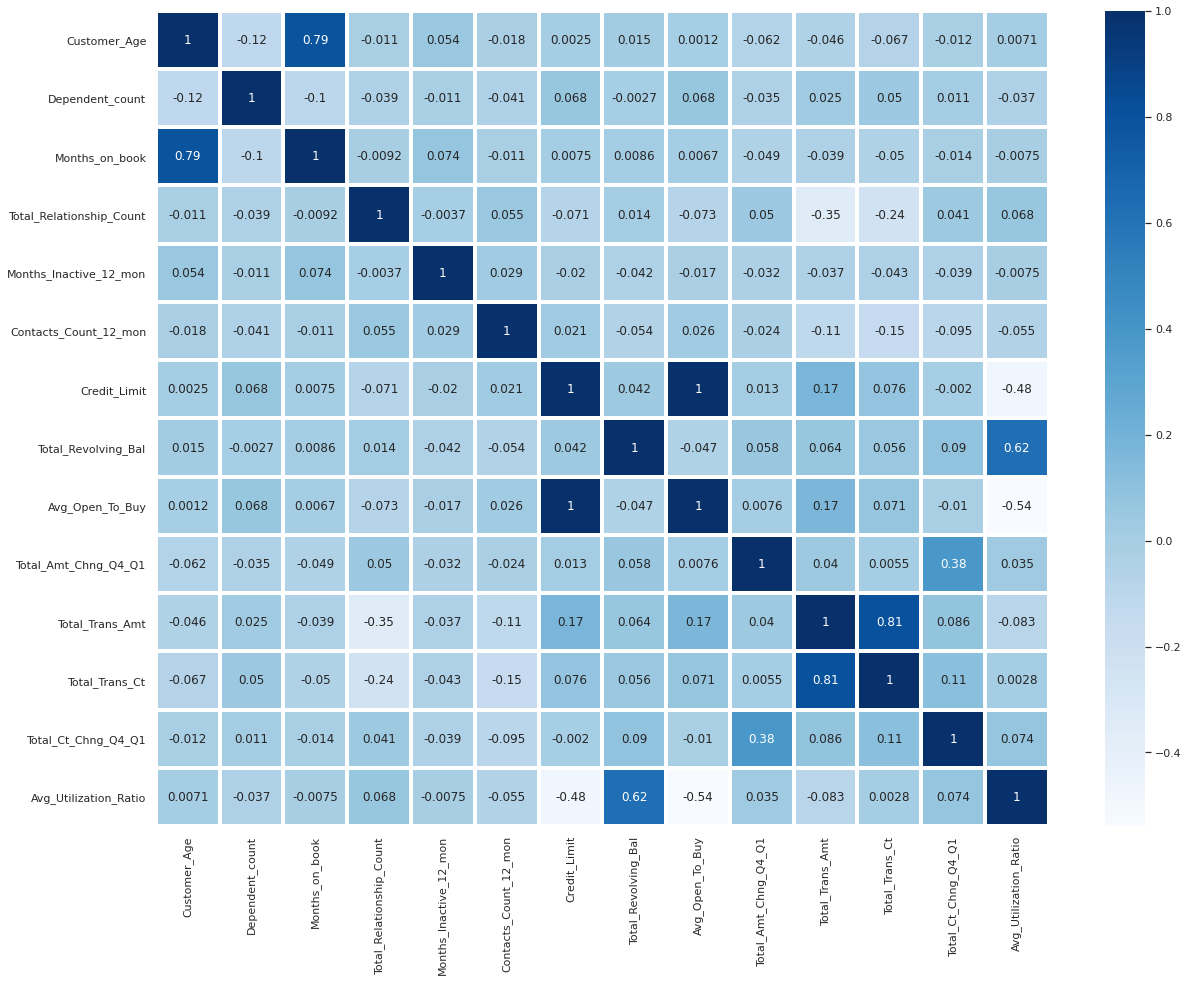

In [21]:
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')

Macierz korelacji zmiennych na wykresie typu heatmap. 

In [22]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
df.drop(df[df['Marital_Status'] == "Unknown"].index, inplace=True)
df.drop(df[df['Income_Category'] == "Unknown"].index, inplace=True)
df.drop(df[df['Education_Level'] == "Unknown"].index, inplace=True)

Usunięcie ze zbioru wierszy, które zawierają "Unknown" dla trzech zmiennych. Można pomyśleć o imputacji danych zamiast usuwania, ale pytanie czy poprawi to jakość modeli.

In [24]:
df.shape

(7081, 20)

In [25]:
X = pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=False)
X = X.drop(['Attrition_Flag'],axis=1)


In [26]:
X

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,0,1,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,1,0,0,0,0,1,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,0,1,0,0,1,0,0,0
5,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,54,1,34,5,2,0,13940.0,2109,11831.0,0.660,...,1,0,0,1,0,0,1,0,0,0
10121,56,1,50,4,1,4,3688.0,606,3082.0,0.570,...,1,0,0,0,0,1,1,0,0,0
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,1,0,1,0,0,0,1,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,0,0,0,0,1,1,0,0,0


In [27]:
X.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Blue',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

Nazwy wszystkich kolumn w nowo utworzonej ramce danych.

In [28]:
y = df['Attrition_Flag']

In [29]:
y.astype(float).describe()

count    7081.000000
mean        0.157181
std         0.363997
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition_Flag, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
scaled_features = pd.DataFrame(X_train, columns = X.columns)
scaled_features.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.454545,0.8,0.534884,0.2,0.166667,0.166667,0.022151,0.414382,0.032596,0.206064,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.568182,0.2,0.558140,0.0,0.500000,0.333333,0.782391,0.959873,0.721438,0.269944,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.431818,0.8,0.534884,0.0,0.500000,0.500000,0.098244,0.000000,0.135746,0.174566,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.409091,0.4,0.418605,0.4,0.333333,0.500000,0.082947,0.805721,0.062324,0.193700,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.500000,0.6,0.674419,0.4,0.333333,0.666667,0.533190,0.000000,0.552603,0.237563,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Podział danych na dane treningowe i dane testowe. Dodatkowo macierz X zarówno treningowa jak i testowa została znormalizowana metodą MinMax.

Walidacja krzyżowa

   CrossVal_Score_Means  CrossValerrors           Algo
0              0.968552        0.007464  XGBClassifier
1              0.901693        0.009798            SVC
2              0.948587        0.007172   RandomForest


/home/adam_s/um/moje_srod/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


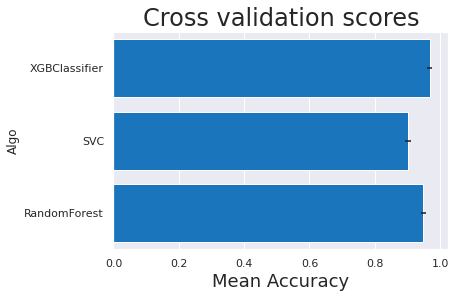

<Figure size 864x576 with 0 Axes>

In [32]:
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 42
clrs = []

clrs.append(xgb.XGBClassifier(random_state=rs))
clrs.append(svm.SVC(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["XGBClassifier","SVC","RandomForest"]})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#0078d7')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

**XGBoost**

In [33]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [34]:
model_xgb = xgb.XGBClassifier(random_state = 42)

In [35]:
param_grid_xgb = [
{"learning_rate"    : [0.1, 0.20, 0.30 ] ,
 #"max_depth"        : [ 3, 6, 15],
 #"min_child_weight" : [ 1, 3, 7 ],
 "gamma"            : [ 0.0, 0.1]
 #"colsample_bytree" : [ 0.3, 0.7 ] 
} ]

In [36]:
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           verbose = 1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/adam_s/um/moje_srod/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [37]:
grid_search.best_params_

{'gamma': 0.0, 'learning_rate': 0.1}

In [38]:
model_xgb = xgb.XGBClassifier(n_estimators = 100, learning_rate=0.2, gamma = 0.0, max_depth = 7, colsample_bytree = 1, min_child_weight = 1)

In [39]:
model_xgb.fit(X_train, y_train)
print(model_xgb)

[20:19:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [40]:
#y_test_xgb  = y_test

predicted_y_xgb = model_xgb.predict(X_test)

print(metrics.accuracy_score(y_test, predicted_y_xgb))
print(metrics.classification_report(y_test, predicted_y_xgb))
print(metrics.confusion_matrix(y_test, predicted_y_xgb))

0.9723320158102767
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1500
           1       0.94      0.87      0.91       271

    accuracy                           0.97      1771
   macro avg       0.96      0.93      0.94      1771
weighted avg       0.97      0.97      0.97      1771

[[1486   14]
 [  35  236]]


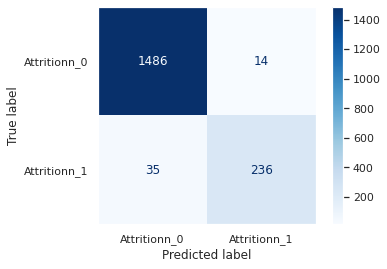

In [42]:
metrics.plot_confusion_matrix(model_xgb,
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attrition_0','Attrition_1'])
plt.grid(False)
plt.show()

14 razy model prognozuje rezygncję klienta z usług kart kredytowych gdzie w rzeczywistości nie miało to miejsca. 35 razy model prognozuje brak rezygnacji klienta z usług kart kredytowych gdzie w rzeczywistości następuje klient rezygnuje. 1486 model poprawnie prognozuje na zbiorze testowym dalsze korzystanie z usług kart kredytowych przez klienta. 236 razy model poprawnie prognozuje rezygnację klienta z usług kart kredytowych.

In [43]:
feature_imp_xgb = pd.Series(model_xgb.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_xgb

Total_Trans_Ct                    0.184351
Total_Revolving_Bal               0.155592
Total_Relationship_Count          0.097534
Total_Trans_Amt                   0.053201
Months_Inactive_12_mon            0.045207
Total_Ct_Chng_Q4_Q1               0.042892
Customer_Age                      0.035563
Avg_Open_To_Buy                   0.031857
Total_Amt_Chng_Q4_Q1              0.031490
Education_Level_Doctorate         0.031158
Gender_F                          0.026730
Avg_Utilization_Ratio             0.024015
Contacts_Count_12_mon             0.022756
Marital_Status_Married            0.019148
Education_Level_College           0.018349
Education_Level_Post-Graduate     0.016878
Months_on_book                    0.015875
Income_Category_$80K - $120K      0.015805
Dependent_count                   0.015749
Credit_Limit                      0.014088
Marital_Status_Divorced           0.013408
Education_Level_High School       0.012944
Education_Level_Uneducated        0.010740
Income_Cate

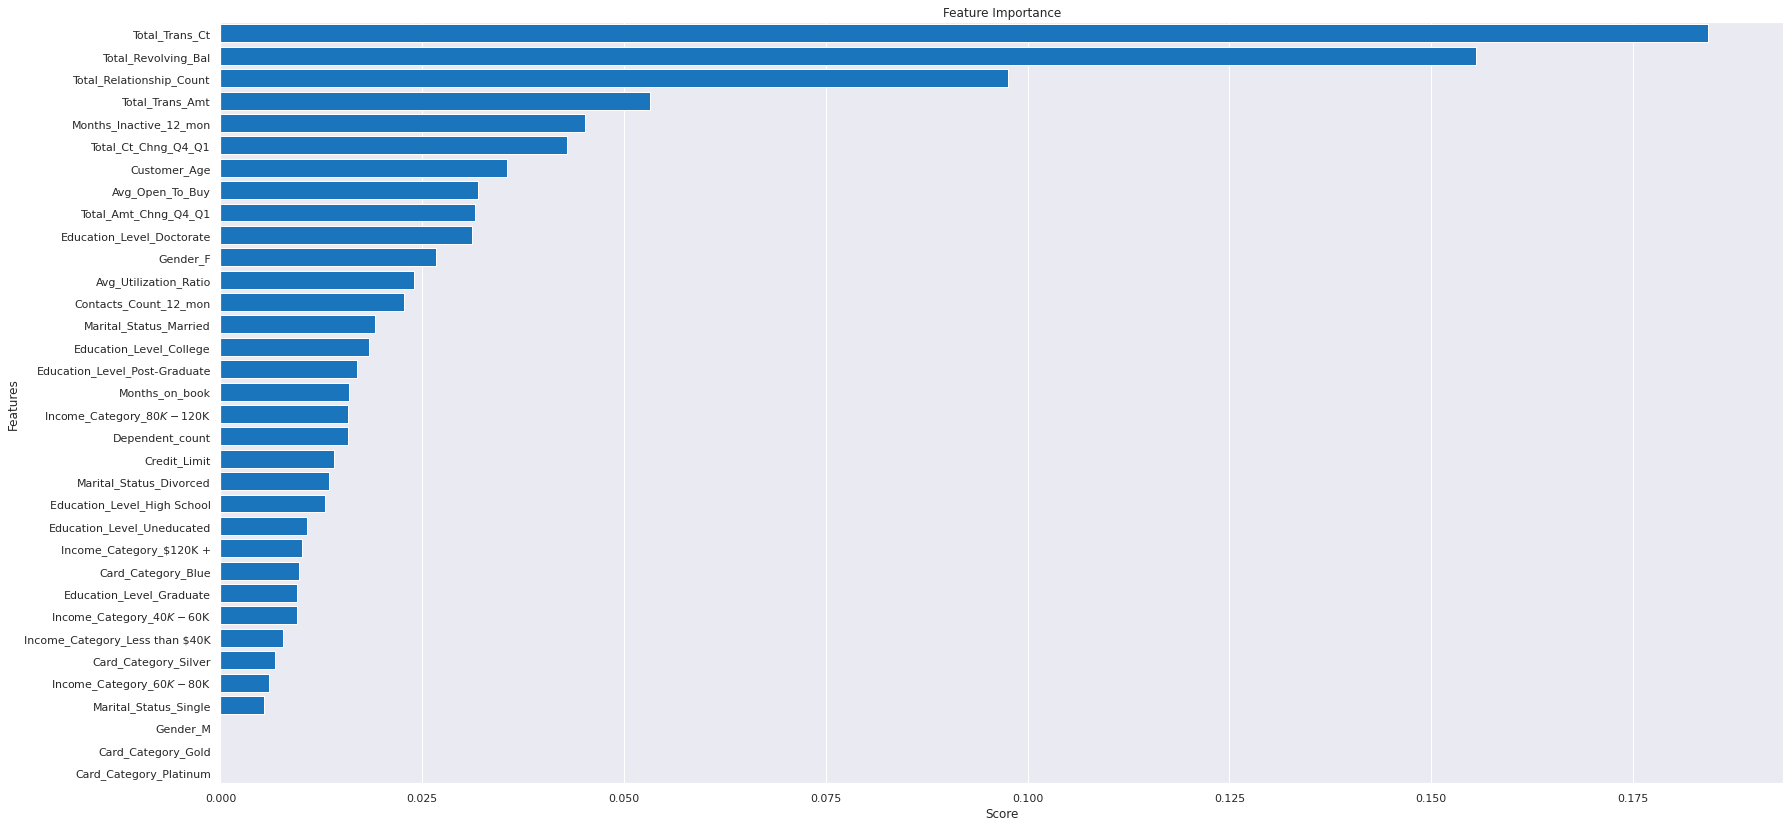

In [44]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature_imp_xgb, y = feature_imp_xgb.index,color = '#0078d7')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [45]:
predicted_y_xgb

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

**Random Forest**

In [46]:
param_grid_rf = [
{'n_estimators': [300, 500, 1000], 
 'max_features': [2, 4, 6, 8]}]


In [47]:
rf = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(rf, param_grid_rf, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           verbose = 1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [300, 500, 1000]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [48]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 1000}

In [49]:
grid_search.score(X_train, y_train)

1.0

In [50]:
grid_search.score(X_test, y_test)

0.9565217391304348

In [51]:
predicted_y_rf_gs = grid_search.predict(X_test)

In [52]:
print(metrics.accuracy_score(y_test, predicted_y_rf_gs))
print(metrics.confusion_matrix(y_test, predicted_y_rf_gs))
print(metrics.classification_report(y_test, predicted_y_rf_gs))

0.9565217391304348
[[1480   20]
 [  57  214]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1500
           1       0.91      0.79      0.85       271

    accuracy                           0.96      1771
   macro avg       0.94      0.89      0.91      1771
weighted avg       0.96      0.96      0.96      1771



In [53]:
rf = RandomForestClassifier(n_estimators = 300, max_features = 8, random_state = 42)

rf.fit(X_train, y_train)

predicted_y_rf=rf.predict(X_test)

In [54]:
print(metrics.accuracy_score(y_test, predicted_y_rf))
print(metrics.confusion_matrix(y_test, predicted_y_rf))
print(metrics.classification_report(y_test, predicted_y_rf))

0.9582156973461321
[[1481   19]
 [  55  216]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1500
           1       0.92      0.80      0.85       271

    accuracy                           0.96      1771
   macro avg       0.94      0.89      0.91      1771
weighted avg       0.96      0.96      0.96      1771



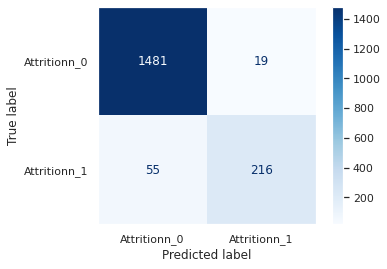

In [56]:
metrics.plot_confusion_matrix(rf,
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attrition_0','Attrition_1'])
plt.grid(False)
plt.show()

19 razy model prognozuje rezygncję klienta z usług kart kredytowych gdzie w rzeczywistości nie miało to miejsca. 55 razy model prognozuje brak rezygnacji klienta z usług kart kredytowych gdzie w rzeczywistości następuje klient rezygnuje. 1481 model poprawnie prognozuje na zbiorze testowym dalsze korzystanie z usług kart kredytowych przez klienta. 216 razy model poprawnie prognozuje rezygnację klienta z usług kart kredytowych.

In [57]:
feature_imp_rf = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_rf

Total_Trans_Amt                   0.177493
Total_Trans_Ct                    0.173612
Total_Revolving_Bal               0.124122
Total_Ct_Chng_Q4_Q1               0.107469
Total_Amt_Chng_Q4_Q1              0.063374
Total_Relationship_Count          0.060826
Avg_Utilization_Ratio             0.058949
Customer_Age                      0.033493
Credit_Limit                      0.031023
Avg_Open_To_Buy                   0.029253
Months_Inactive_12_mon            0.024182
Months_on_book                    0.023955
Contacts_Count_12_mon             0.023181
Dependent_count                   0.012144
Gender_M                          0.005872
Gender_F                          0.005542
Marital_Status_Married            0.005040
Marital_Status_Single             0.004081
Education_Level_Graduate          0.003523
Income_Category_$80K - $120K      0.003076
Income_Category_Less than $40K    0.003072
Education_Level_Uneducated        0.002855
Income_Category_$40K - $60K       0.002800
Education_L

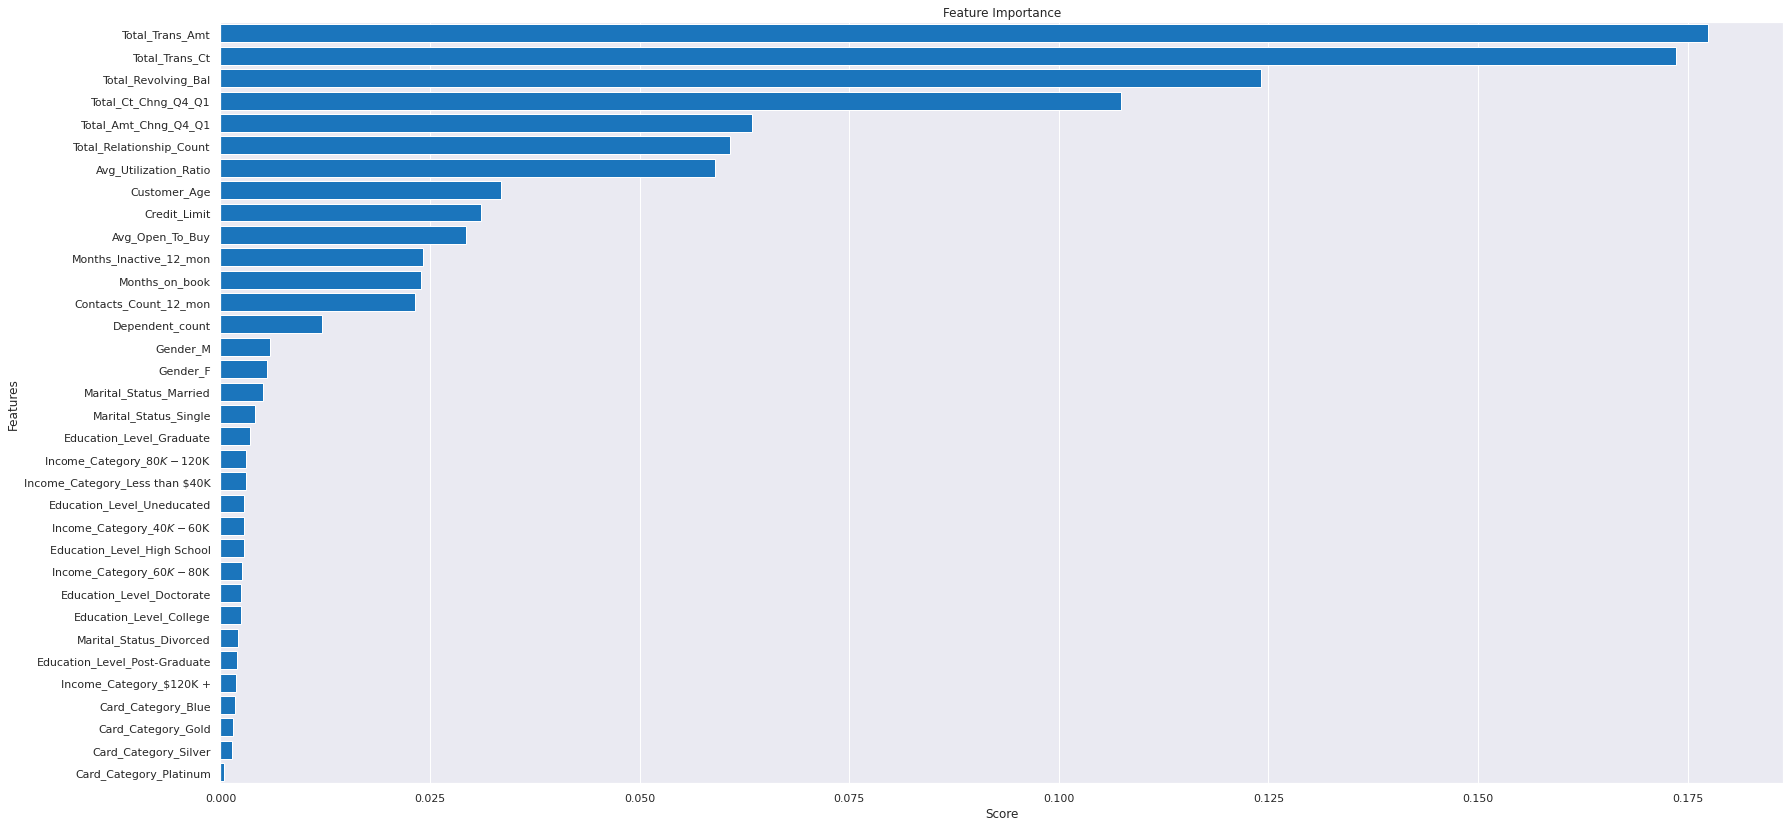

In [58]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature_imp_rf, y = feature_imp_rf.index,color = '#0078d7')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

**SVM**

In [59]:
param_grid_svmc = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}

In [60]:
svmc = svm.SVC()

grid_search = GridSearchCV(svmc, param_grid_svmc, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           verbose = 1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

In [61]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [62]:
grid_search.score(X_test, y_test)

0.9226425748164878

In [63]:
predicted_y_svmc_gs = grid_search.predict(X_test)

In [64]:
svmc = svm.SVC(kernel='rbf', C = 100, gamma = 0.1)
svmc.fit(X_train, y_train)
predicted_y_svmc = svmc.predict(X_test)

In [65]:
print(metrics.accuracy_score(y_test, predicted_y_svmc))
print(metrics.confusion_matrix(y_test, predicted_y_svmc))
print(metrics.classification_report(y_test, predicted_y_svmc))

0.9153020892151327
[[1446   54]
 [  96  175]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1500
           1       0.76      0.65      0.70       271

    accuracy                           0.92      1771
   macro avg       0.85      0.80      0.83      1771
weighted avg       0.91      0.92      0.91      1771



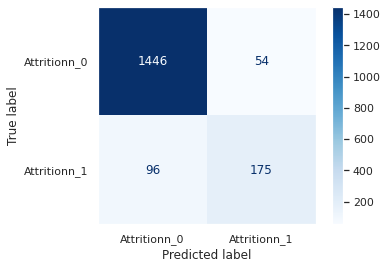

In [66]:
metrics.plot_confusion_matrix(svmc,
                      X_test, y_test,
                      cmap=plt.cm.Blues,
                      display_labels = ['Attrition_0','Attrition_1'])
plt.grid(False)
plt.show()

54 razy model prognozuje rezygncję klienta z usług kart kredytowych gdzie w rzeczywistości nie miało to miejsca. 96 razy model prognozuje brak rezygnacji klienta z usług kart kredytowych gdzie w rzeczywistości następuje klient rezygnuje. 1446 model poprawnie prognozuje na zbiorze testowym dalsze korzystanie z usług kart kredytowych przez klienta. 175 razy model poprawnie prognozuje rezygnację klienta z usług kart kredytowych.

**Porównanie modeli**

In [67]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = metrics.roc_curve([int(i) for i in y_test], random_probs)
fpr_xgb, tpr_xgb, thresholds_xgb = metrics.roc_curve([int(i) for i in y_test],[int(i) for i in predicted_y_xgb])
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve([int(i) for i in y_test],[int(i) for i in predicted_y_rf])
fpr_svmc, tpr_svmc, thresholds_svmc = metrics.roc_curve([int(i) for i in y_test],[int(i) for i in predicted_y_svmc])

In [68]:
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)
roc_auc_svmc = metrics.auc(fpr_svmc, tpr_svmc)
print("auc dla xgb:", roc_auc_xgb)
print("auc dla rf:", roc_auc_rf)
print("auc dla svmc:", roc_auc_svmc)

auc dla xgb: 0.9307576875768757
auc dla rf: 0.892190651906519
auc dla svmc: 0.8048782287822878


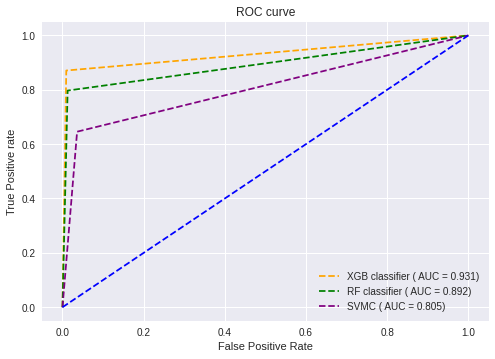

In [69]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='orange')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='green')
plt.plot(fpr_svmc, tpr_svmc, linestyle='--',color='purple')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(['XGB classifier ( AUC = ' "{:.3f})".format(roc_auc_xgb),
            'RF classifier ( AUC = ' "{:.3f})".format(roc_auc_rf),
            'SVMC ( AUC = ' "{:.3f})".format(roc_auc_svmc)],
            loc='lower right')
#plt.savefig('ROC',dpi=300)
plt.show()

Krzywa ROC dla zbiorów testowych, najlepszy model to XGBoost, potem RF, i na końcu SVM. Trzeba pomyśleć o niedowartościowaniu 1 w zbiorze.